<a href="https://colab.research.google.com/github/paolaportilloj/Visualizaci-n-de-datos-para-la-toma-de-decisiones/blob/main/Copia_de_Avancespb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **¿Como piensan los alumnos del Tecnológico de Monterrey?**




Paola Portillo Jiménez A01620499

Se generó una encuesta a diversos estudiantes del Tec en donde cuentan con una carrera, edad y semestre diferente. Se recolectó información acerca de sus gustos e información personal. Se espera que por medio de la base de datos se puedan llegar a diferentes conclusiones en donde se puedan encontrar similitud entre los alumnos.

**Descripción de las variables**

**Categóricas**

1. Nombre completo: nombre del estudiante
2. Tec: Si son alumnos del Tecnológico de Monterrey
3. Semestre: en el semestre que estan actualmente
4. Carrera: cual carrera estan cursando
5. Género: si es hombre o mujer
6. Comida: describe la comida favorita del estudiante
7. Mejor superbowl en los últimos 5 años: cual consideran que ha sido el mejor show en el medio tiempo del Superbowl en los últimos 5 años.
8. Personaje favorito de Friends: Cual es su personaje favorito de la serie de Friends
9. Deporte: el deporte favorito 
10. Serie: su serie favorita 
11. Reggaetonero favorito:artista favorito del genero de reggaton
12. Personaje Favorito de Avengers: personaje favorito de Marvel
13. Cantante favorito mexicano: cantante favorito de México
14. Genero de música: su genero de música favorito
15. Equipo favorito mexicano de fútbol: equipo de fútbol mexicano favorito
16. Tienes novi@: si en este momento tienen novio o novia
17. Foráneo: si es foráneo o es de Monterrey
18. Pariente Favorito: con cual de sus parientes tiene una mayor conexión
19. Color Favorito: el color favorito de cada persona
20. Religión: el tipo de religión 
21. Quién es mejor: si el jugador Messi es mejor jugador que Cristiano


**Numéricas**
1. Edad: cuantos años tienen
2. Cuántos hermanos tienes: los hermanos con los que cuentan
3. Cuántos idiomas sabes hablar: los idiomas que saben hablar, contando con el nativo
4. Cuántas mascotas tienes: las mascotas que tienen, incluyendo en la casa de sus padres (si es que son foráneos)






In [229]:
path='/content/drive/MyDrive/5to semestre/1er periodo/Visualización de datos para la toma de decisiones/Base de datos de estudiantes TEC.xlsx'

In [230]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

In [231]:
df = pd.read_excel(path)

In [232]:
cols=df.columns

In [233]:
df.shape

(29, 32)

In [234]:
cols=cols.to_list()

In [235]:
df.index = df.index + 1

### **1. ¿Cuántos hombres y mujeres hay en la base de datos?** (pivot)

In [236]:
countsDF = pd.pivot_table(data=df,
               index='Genero',
               values='Quién es mejor',
               aggfunc='count',
               )


In [237]:
countsDF=countsDF.rename({'Quién es mejor':'Hombres VS. Mujeres'},
                     axis=1)
countsDF

,Hombres VS. Mujeres
Genero,
Hombre,17
Mujer,12


Como se puede observar el total de personas entrevistadas es de 29 personas en donde hay 17 hombres y 12 mujeres.

### **2. ¿Como se relaciona el peso con la altura?**

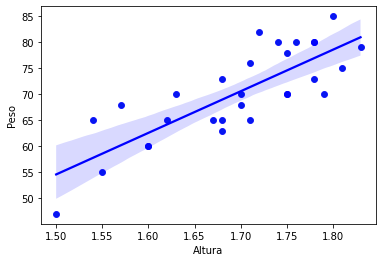

In [238]:
sns.scatterplot(data=df, x='Altura', y='Peso')
sns.regplot(data=df, x='Altura', y='Peso', color='b')
plt.show()

Como se puede observar en la gráfica superior la mayoria de las personas cuentan con un peso lineal que crece como tal, existen alguna escepciones pero los datos se apegan a la linea de tendencia.

### **3. ¿Cuál es la moda en la religión?**

In [239]:
religion=pd.pivot_table(data=df,
               index='Religión',
               values='Quién es mejor',
               aggfunc='count',
               )

In [240]:
religion=religion.rename({'Quién es mejor':'Nùmero de personas'},
                     axis=1)
religion

,Nùmero de personas
Religión,
Agnóstico,2
Ateo,9
Católica,16
Cristiana,1
Evangelica,1


In [241]:
religiones = ['Agnóstico', 'Ateo', 'Católica', 'Cristiana', 'Evangelica']
personas = [2, 9, 16, 1, 1]
colores = ['green', 'blue', 'red', 'yellow', 'purple']

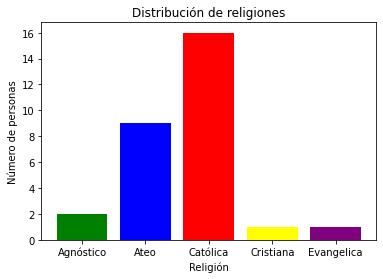

In [242]:
plt.bar(religiones, personas, color=colores)
plt.xlabel('Religión')
plt.ylabel('Número de personas')
plt.title('Distribución de religiones')
plt.show()

Como se puede observar existen diferentes religiones las cuales son: agnóstico, ateo, católica, cristiana y evangélica. En donde la moda es de a religión catoltica con 16 personas, que es mas de la mitad de las personas evaluadas.

### **4. ¿Exiten hombres y mujeres que estudian lo mismo y tienen la misma edad?**


In [243]:
c=pd.pivot_table(data=df,
                 index= ['Edad','Genero','Carrera '],
                 aggfunc='count',
                 values='Quién es mejor'
)
c=c.rename({'Quién es mejor':'Genero '},
                     axis=1)
c

Genero 
Edad Genero Carrera          
20.0 Hombre IDM             1
            IIS             2
            ITC             1
     Mujer  IID             1
            IIS             2
            IMT             1
21.0 Hombre IDM             1
            IE              3
            IIS             1
            ITD             1
            LAF             1
            led             1
     Mujer  ARQ             1
            IDM             2
            IIS             1
            LDI             1
            LEM             1
22.0 Hombre IBT             1
            IIS             2
            IMT             1
            LAF             1
     Mujer  IIS             1
            IQ              1

In [244]:
c=c.reset_index()

In [245]:
fig=px.sunburst(c,
                path=['Genero','Edad', 'Carrera '],
                values='Genero '
                )
fig.show()

Como se puede ver no existe una ran relacion entre el genero, carrera y edad ya que la mayorìa de las personas estudian una carrera diferente o tienen edad diferente. En el caso del la ingenerìa electronica, por sus siglas, IE, existen una relacion en que tres de ellos son hombres y tienen 21 años. 

### **5. ¿Cuál es el cantante favorito mexicano de los entrevistados?**

In [246]:
counts = df['Cantante favorito mexicano '].value_counts()

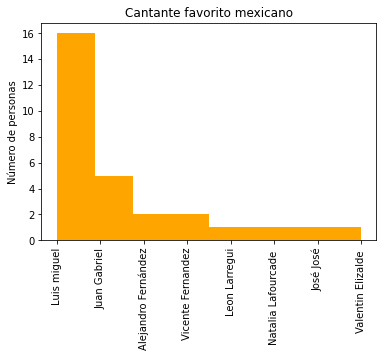

In [247]:
plt.hist(counts.index, weights=counts.values, bins=len(counts), color='orange')
plt.title('Cantante favorito mexicano')
plt.ylabel('Número de personas')
plt.xticks(rotation=90)
plt.show()

### **6. ¿Existe alguna correlación entre el peso, altura y edad?**


In [248]:
correlation = df['Peso'].corr(df['Altura'])
print(correlation)

0.8079331394488655


In [249]:
correlation = df['Peso'].corr(df['Edad'])
print(correlation)

0.2311382867905357


In [250]:
correlation = df['Altura'].corr(df['Edad'])
print(correlation)

0.06421882282421858


In [251]:
corr_matrix = df.corr()
print(corr_matrix)

            Edad    Altura      Peso
Edad    1.000000  0.064219  0.231138
Altura  0.064219  1.000000  0.807933
Peso    0.231138  0.807933  1.000000


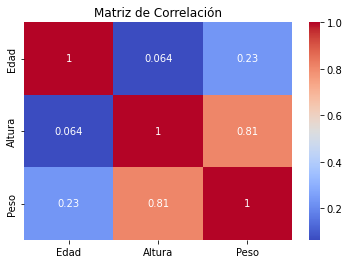

In [252]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Como se puede observar en la tabla por tonalidades la edad no influye con el peso ni con la altura pero el peso y la altura si tienen una correlacion significante de 0.81


### **7. ¿Se puede calcular un peso que no este en la base de datos?**

In [253]:
ndf=df[[ 'Altura', 'Peso'] ]
ndf=ndf.dropna()
ndf.isnull().any()

Altura    False
Peso      False
dtype: bool

In [254]:
from sklearn import linear_model
import statsmodels.api as sm

In [255]:
X= ndf[[ 'Altura']]
y=ndf['Peso' ]

In [256]:
lm=linear_model.LinearRegression()
model=lm.fit(X,y)
model


LinearRegression()

In [257]:
model.coef_


array([79.90202296])

In [258]:
model.intercept_

-65.26143065508276

In [259]:
modelA=sm.OLS.from_formula('Altura ~ Peso ',
                           data=ndf)
resultA=modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Altura   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     50.76
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.16e-07
Time:                        01:48:41   Log-Likelihood:                 45.134
No. Observations:                  29   AIC:                            -86.27
Df Residuals:                      27   BIC:                            -83.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1220      0.081     13.828      0.000       0.956       1.289
Peso           0.0082      0.001      7.124      0.000       0.006       0.011
==============================================================================
Omnibus:                        0.507   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.489
Skew:                          -0.277   Prob(JB):                        0.783
Kurtosis:                       2.689   Cond. No.                         585.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:

altura=float((input('Ingresa Altura')))

Ingresa Altura1.70


In [261]:
print('Peso de una persona con altura de', altura, 'es',
      altura*model.coef_+model.intercept_)

Peso de una persona con altura de 1.7 es [70.57200837]


Como se puede observar si se aproxima al resultado, mas no e exacto ya que solo se cuenta con una variable para hacer la regresion, si se agrega el tipo de alimentacion que tienen o si hacen ejercicio seria mas exacto. Se cuenta que contiene un r cuadrada se 0.653 lo cual es buena ya que se aproxima al 1. 